In [293]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [294]:
data = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [295]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


* I would like to add some informations about our features and what do they mean.
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


* We have no missing values, this is a good thing.
* We already have index so serial no is unnecessary at this point, so i am just going to drop it.

In [297]:
data=data.drop("Serial No.",axis=1)

In [298]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [299]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

* We have to fix the column names, if you look at "LOR" and "Chance of Admit" you'll see there is a space in the end. 
* And we dont want space between words, so i am going to add underscore between words, and switch all uppercase letters to lowercase.

In [300]:
data.columns = ["gre_score","toefl_score","uni_rating","sop","lor","cgpa","research","admit_chance"]

In [301]:
data.columns

Index(['gre_score', 'toefl_score', 'uni_rating', 'sop', 'lor', 'cgpa',
       'research', 'admit_chance'],
      dtype='object')

In [302]:
data.describe()

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,admit_chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


* First lets look at correlation matrix.

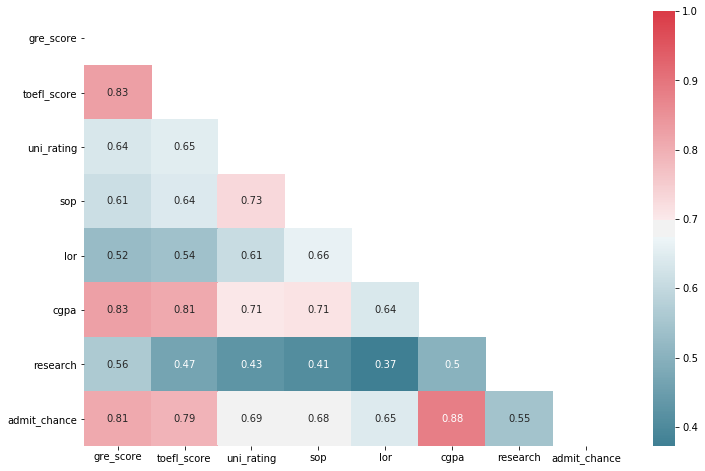

In [303]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, ax=ax,)
plt.show()

* Other then research, all of our features impact chance of admit more then 0.6 rate. And most effective is cgpa with 0.88.
* And we have some nice correlations between our features. These are:
* toefl and gre score
* cgpa and gre score
* and cgpa and toefl score
* These all have correlation higher than 0.8.
* We'll take a look at all these correlations.

* But before we dive into the features, i'll seperate the chance of admit to two classes:
    * if it is 0.7 or above it's 1
    * if lower it's 0

In [304]:
def modify(feature):
    if feature["admit_chance"] >= 0.7:
        return 1
    return 0 

data["admit_chance"] = data.apply(modify,axis=1)
data.head()

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,admit_chance
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


* Now we can look at distributions of our data.

### Visualization

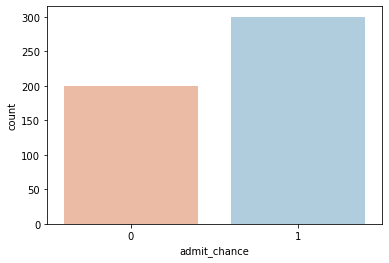

In [305]:
sns.countplot(x = "admit_chance",data=data,palette="RdBu")
plt.show()

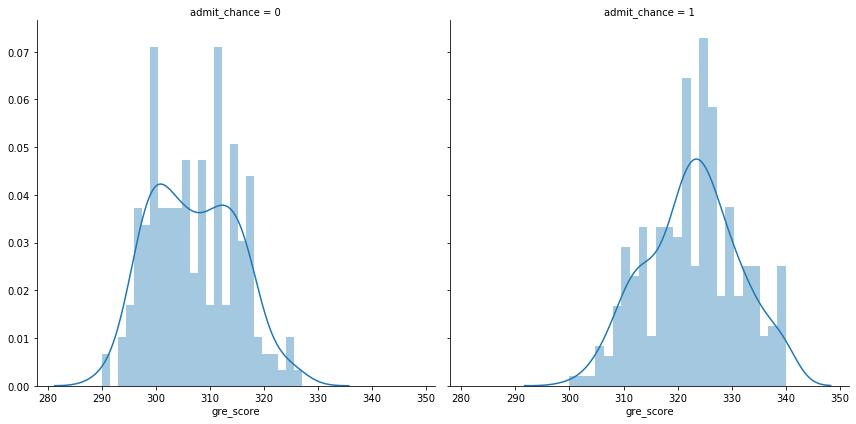

admit_chance
0    307.025
1    322.770
Name: gre_score, dtype: float64

In [306]:
c = sns.FacetGrid(data,col="admit_chance",height=6)
c.map(sns.distplot,"gre_score",bins=25)
plt.show()
data.groupby("admit_chance")["gre_score"].mean()

* We can see how gre scores distributed around 300 - 310 for admit chance = 0 
* And of course it is higher for admit chance = 1, we have peak around 325.

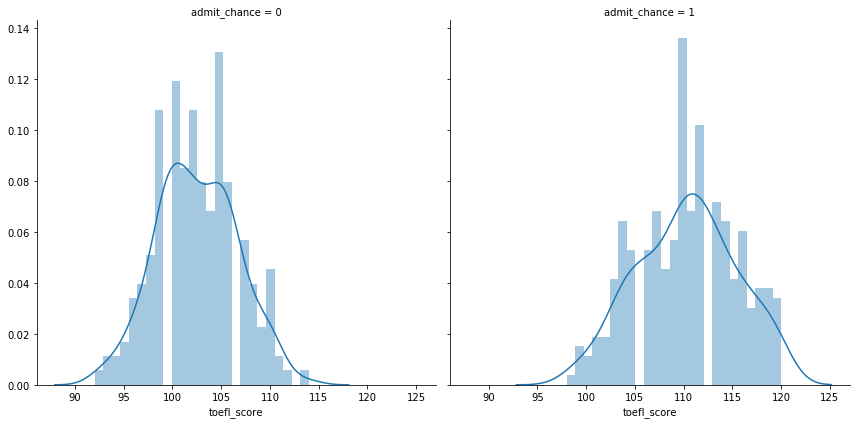

admit_chance
0    102.505000
1    110.316667
Name: toefl_score, dtype: float64

In [307]:
c = sns.FacetGrid(data,col="admit_chance",height=6)
c.map(sns.distplot,"toefl_score",bins=25)
plt.show()
data.groupby("admit_chance")["toefl_score"].mean()

* Most of those who admitted's scores are around 110 and that is what visualization's tells us.

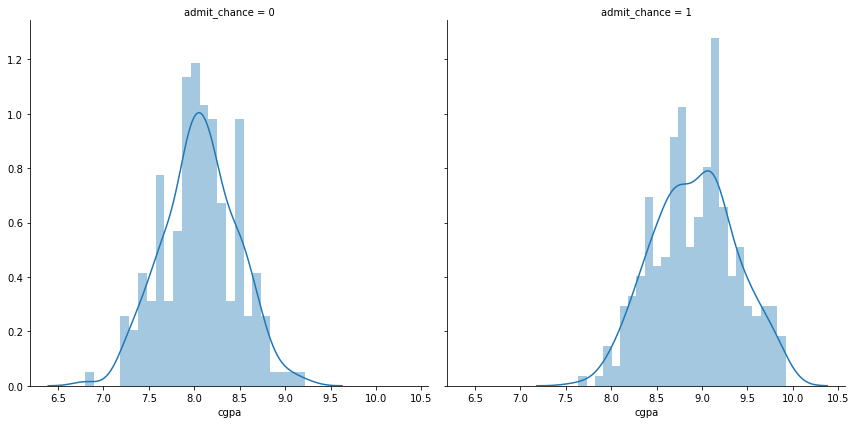

admit_chance
0    8.0617
1    8.9196
Name: cgpa, dtype: float64

In [308]:
c = sns.FacetGrid(data,col="admit_chance",height=6)
c.map(sns.distplot,"cgpa",bins=25)
plt.show()
data.groupby("admit_chance")["cgpa"].mean()

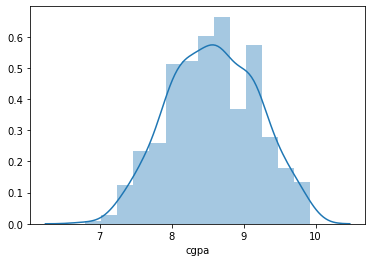

In [309]:
sns.distplot(data["cgpa"])
plt.show()

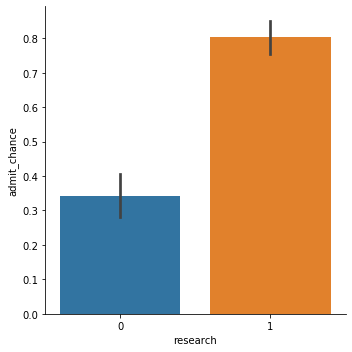

In [310]:
sns.catplot(x="research",y="admit_chance",data=data,kind="bar")
plt.show()

* Most of who didnt have research experience have low chance of admit as expected.

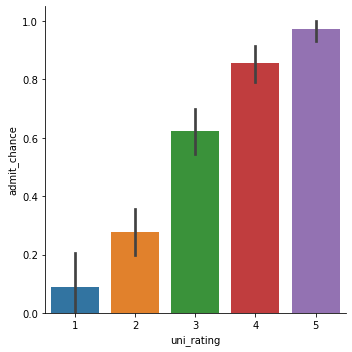

In [311]:
sns.catplot(x="uni_rating",y="admit_chance",data=data,kind="bar")
plt.show()

* Uni ratings 1 and 2 have very low chance of admit. I am going to group 1-2 as 0 and the rest as 1. 

In [312]:
def modify(feature):
    if feature["uni_rating"] >= 3:
        return 1
    return 0 

data["uni_rating"] = data.apply(modify,axis=1)
data.head()

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,admit_chance
0,337,118,1,4.5,4.5,9.65,1,1
1,324,107,1,4.0,4.5,8.87,1,1
2,316,104,1,3.0,3.5,8.00,1,1
3,322,110,1,3.5,2.5,8.67,1,1
4,314,103,0,2.0,3.0,8.21,0,0


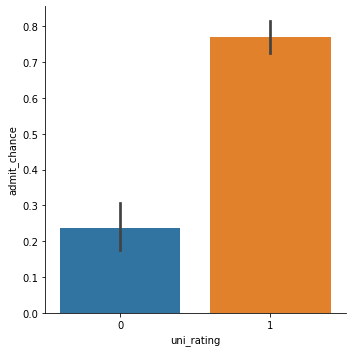

In [313]:
sns.catplot(x="uni_rating",y="admit_chance",data=data,kind="bar")
plt.show()

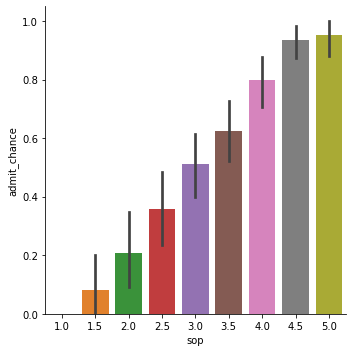

In [314]:
sns.catplot(x="sop",y="admit_chance",data=data,kind="bar")
plt.show()

* Same goes for here too. If statement of purpose rating is lower then 3 it's highly unlikely that you'll accepted. So im going to group 1 to 2.5 as 0 and the rest as 1.

In [315]:
def modify(feature):
    if feature["sop"] >= 3.0:
        return 1
    return 0 

data["sop"] = data.apply(modify,axis=1)
data.head()

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,admit_chance
0,337,118,1,1,4.5,9.65,1,1
1,324,107,1,1,4.5,8.87,1,1
2,316,104,1,1,3.5,8.00,1,1
3,322,110,1,1,2.5,8.67,1,1
4,314,103,0,0,3.0,8.21,0,0


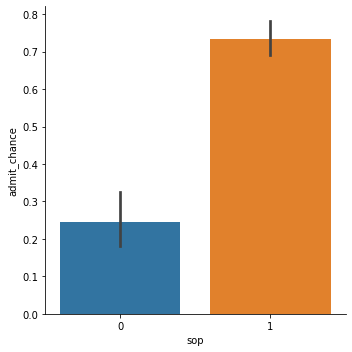

In [316]:
sns.catplot(x="sop",y="admit_chance",data=data,kind="bar")
plt.show()

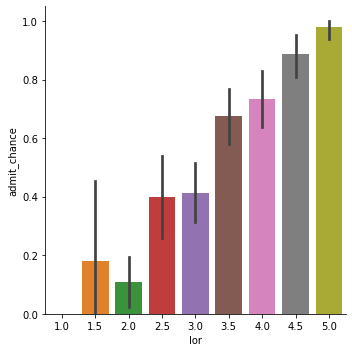

In [317]:
sns.catplot(x="lor",y="admit_chance",data=data,kind="bar")
plt.show()

* We have some exceptions here but same goes for letter of recommendation too. Lower then 0 to 2.5 as 0 and rest is 1.

In [318]:
def modify(feature):
    if feature["lor"] >= 3.0:
        return 1
    return 0 

data["lor"] = data.apply(modify,axis=1)
data.head()

,gre_score,toefl_score,uni_rating,sop,lor,cgpa,research,admit_chance
0,337,118,1,1,1,9.65,1,1
1,324,107,1,1,1,8.87,1,1
2,316,104,1,1,1,8.00,1,1
3,322,110,1,1,0,8.67,1,1
4,314,103,0,0,1,8.21,0,0


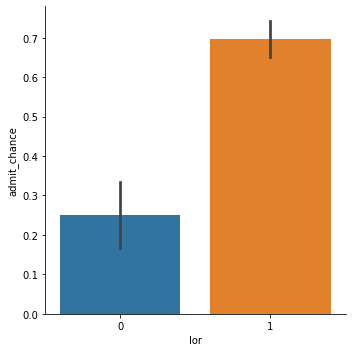

In [319]:
sns.catplot(x="lor",y="admit_chance",data=data,kind="bar")
plt.show()

* Now we checked and grouped our features. We can take a look at correlations between cgpa, toefl and gre scores.


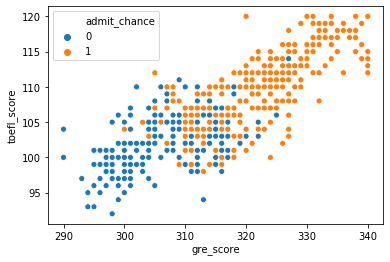

In [320]:
sns.scatterplot(data = data, x ="gre_score", y="toefl_score",hue="admit_chance")
plt.show()

* We have some exceptions like the little blue dot in the middle, but rest is expected. Students that have higher gre score usually have high toefl scores.

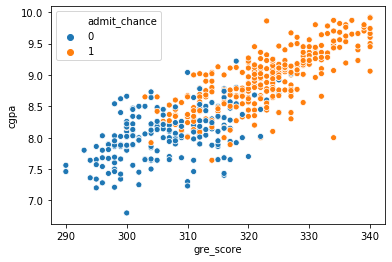

In [321]:
sns.scatterplot(data = data, x ="gre_score", y="cgpa",hue="admit_chance")
plt.show()

* Same goes for here too, except we have not much outliers in here. Students with higher cgpa (higher than 9) usually admitted to university. 

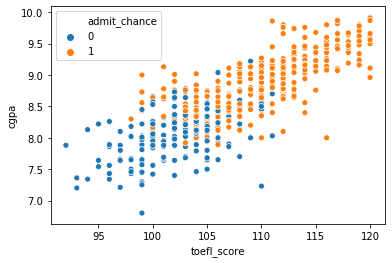

In [322]:
sns.scatterplot(data = data, x ="toefl_score", y="cgpa",hue="admit_chance")
plt.show()

* Same trend goes for here too.

### Modeling

In [323]:
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
import xgboost as xgb
from xgboost import XGBClassifier

In [324]:
x = data.drop("admit_chance",axis = 1)
y = data["admit_chance"]

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [325]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

print("x_train:", len(x_train))
print("x_test:", len(x_test))
print("y_train:", len(y_train))
print("y_test:", len(y_test))

x_train: 350
x_test: 150
y_train: 350
y_test: 150


* First i want to fit a logistic regression model and then tune the parameters and do grid search.

In [326]:
logreg = LogisticRegression(max_iter=500)

logreg.fit(x_train,y_train)

print("Train Accuracy:", logreg.score(x_train,y_train))
print("Test Accuracy:", logreg.score(x_test,y_test))

Train Accuracy: 0.88
Test Accuracy: 0.82


* So we have 82% test accuracy, let's see if we can get it up 90%.

### Hyperparameter tuning and GridSearchCV

In [327]:
classifier = [KNeighborsClassifier(),
              DecisionTreeClassifier(random_state=42),
              LogisticRegression(random_state=42),
              SVC(random_state=42),
              RandomForestClassifier(random_state=42),
              XGBClassifier(random_state=42, objective="binary:logistic")]

knn_params = {"n_neighbors": np.linspace(1,19,10,dtype=int),
                 "weights": ["uniform","distance"],
                 "metric": ["euclidean","manhattan","minkowski"]}

dt_params = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)} 

lr_params = {"C":np.logspace(-3,3,7),
             "penalty": ["l1","l2"]}

svm_params = {"kernel" : ["rbf"],
              "gamma": [0.001, 0.01, 0.1, 1],
              "C": [1,10,50,100,200,300,1000]}

rf_params = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

xgb_params = {"learning_rate":[0.01,0.1,1],
              "n_estimators":[50,100,150],
              "max_depth":[3,5,7],
              "gamma":[1,2,3,4]}

classifier_params = [knn_params,
                     dt_params,
                     lr_params,
                     svm_params,
                     rf_params,
                     xgb_params]

In [328]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(estimator = classifier[i], param_grid = classifier_params[i],
                       cv = StratifiedKFold(n_splits=10),scoring="accuracy",n_jobs= -1, verbose= 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8685714285714287
Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8514285714285714
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 123 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8771428571428572
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


0.8742857142857143
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   57.9s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.1min finished


0.8742857142857143
Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed:    9.6s


0.8714285714285716


[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   14.8s finished


In [329]:
cv_results = pd.DataFrame({"ML Models":["KNeighborsClassifier",
                                        "Decision Tree",
                                        "Logistic Regression",
                                        "SVM",
                                        "Random Forest",
                                        "XGBClassifier"],
                           "Cross Validation Means":cv_result})
print(cv_results)

              ML Models  Cross Validation Means
0  KNeighborsClassifier                0.868571
1         Decision Tree                0.851429
2   Logistic Regression                0.877143
3                   SVM                0.874286
4         Random Forest                0.874286
5         XGBClassifier                0.871429


* So here we have a winner: Logistic Regression with 87.7% accuracy.
* We have used many classifiers but LR outperformed all.
* If you like my notebook please upvote and if i have mistakes please tell me.